# Modelos de Decision Trees y Random Forest para determinar preferencias y factores que influyen en el consumo de cerveza artesanal en mujeres
## Integrantes: Oscar Roncancio, Marcela Palencia, Diana Bustos

En el desarrollo de este notebook se hace una propuesta de los modelos de Decision Trees y Random Forest para determinar preferencias y factores que influyen en el consumo de cerveza artesanal en mujeres basado en la encuesta generada previamente en nuestro trabajo de investigación, cabe destacar que todos los valores generados como se explicará en el desarrollo de este informe son totalmente aleatorios, por lo que no deben tenerse en cuenta los resultados brindados, el proposito es exclusivamente brindar una propuesta y una guía de como usar Decision Trees y Random Forest en caso realizar un número de encuestas razonables siguiendo nuestro modelo.

Adicionalmente y con propositos de generar valores aleatorios en distintas ciudades de Colombia se hace uso del archivo Departamentos y municipios recopilado de la pagina: https://www.datos.gov.co/Mapas-Nacionales/Departamentos-y-municipios-de-Colombia/xdk5-pm3f/about_data

# Importando librerias principales

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulación aleatoria del dataset basado en la encuesta

In [92]:
#importamos el archivo de csv con las ciudades de colombia
df_ciudades = pd.read_csv('Departamentos_y_municipios_de_Colombia_20240718.csv')
df_ciudades

,REGION,CÓDIGO DANE DEL DEPARTAMENTO,DEPARTAMENTO,CÓDIGO DANE DEL MUNICIPIO,MUNICIPIO
0,Región Eje Cafetero - Antioquia,5,Antioquia,5.001,Medellín
1,Región Eje Cafetero - Antioquia,5,Antioquia,5.002,Abejorral
2,Región Eje Cafetero - Antioquia,5,Antioquia,5.004,Abriaquí
3,Región Eje Cafetero - Antioquia,5,Antioquia,5.021,Alejandría
4,Región Eje Cafetero - Antioquia,5,Antioquia,5.030,Amagá
...,...,...,...,...,...
1118,Región Eje Cafetero - Antioquia,17,Caldas,17.444,Marquetalia
1119,Región Pacífico,52,Nariño,52.051,Arboleda
1120,Región Pacífico,76,Valle del Cauca,76.109,Buenaventura
1121,Región Caribe,47,Magdalena,47.189,Ciénaga


In [93]:
#Vamos a generar un script para simular datos de una encuesta para este primer caso nuestra variable objetivo será la frecuencia de consumo
#La encuesta se va a realizar a 1000 personas
np.random.seed(0)
N=10000
#Primero las personas van a responder si se identifican o no como mujeres esto sera en un dataset y esta sera la primera columna
Mujer = np.random.choice([0, 1], N)
#la segunda columna sera la edad separada en estos grupos: 18-25 años__ 26-35 años__ 36-45 años__ 46-60 años __ más de 60 años__ usaremos ordinal encoding
edad = np.random.choice([1, 2, 3, 4, 5], N)
#La tercera sera en que ciudad de colombia viven, para esto vamos a usar la columna de municipio del df_ciudades
ciudad = np.random.choice(df_ciudades['MUNICIPIO'], N)
#La cuarta columna sera si la persona tiene hijos o no
hijos = np.random.choice([0, 1], N)
#La quinta columna sera si la persona tiene pareja o no
pareja = np.random.choice([0, 1], N)
#La sexta sera con que frecuencia fuma la persona en estos rangos: Menos de 1 al día__ Entre 1 y 4 al día__ Entre 5 y 9 al día__ Más de 10__
fuma = np.random.choice([1, 2, 3, 4], N)
#La septima será ¿Cuánto son sus ingresos mensuales? 1-2smlv_ 3-4 smlv__ 5-6 smlv__ más de 7 smlv
ingresos = np.random.choice([1, 2, 3, 4], N)
#La octava será ¿Qué nivel educativo tiene? Bachiller__ pregrado__ posgrado__ ninguno__
educacion = np.random.choice([1, 2, 3, 0], N)
#La novena será Se considera usted consumidora de cerveza: frecuente__ ocasional__ no consume__
cerveza = np.random.choice(['Frecuente', 'Ocasional', 'No consume'], N)
#La decima será ¿Qué tipo de cerveza prefiere? Cerveza artesanal__ cerveza industrial__
tipo_cerveza = np.random.choice([0, 1], N)
#La onceava será ¿Se considera usted como conocedora de la cerveza artesanal? Si__ No__
conocedora = np.random.choice([0, 1], N)
#La doceava es una pregunta con multiples respuestás cada respuesta debe ser una coluna y debe ser si o no para cada valor: Ligera__ pesada__ fuerte__ refrescante__ dulce__ amarga__ acida__ robusta__ oscura__ frutal__ otra____
pregunta = ['Ligera', 'Pesada', 'Fuerte', 'Refrescante', 'Dulce', 'Amarga', 'Acida', 'Robusta', 'Oscura', 'Frutal', 'Otra']
respuestas = np.random.choice([0, 1], size=(N, 11))
df_respuestas = pd.DataFrame(respuestas, columns=pregunta)
#La treceava será ¿Qué color de cerveza considera usted más agradable? Dorada__ ambar__ roja__ café__ negra__ 
color = np.random.choice(['Dorada', 'Ambar', 'Roja', 'Café', 'Negra'], N)
#convertimos a one hot encoding
color = pd.get_dummies(color)
#Para la catorceava la respuesta sera una lista respecto a esta pregunta: Ordene de mayor a menor (siendo 1 el mayor y 7 el menor) la influencia sobre su preferencia por una cerveza los siguientes factores: Precio__ origen__ sostenibilidad__ comunidad__ sentido de pertenencia__ representación femenina__ empaque__
factores = ['Precio', 'Origen', 'Sostenibilidad', 'Comunidad', 'Sentido de pertenencia', 'Representación femenina', 'Empaque']
orden = np.random.choice(range(1, 8), size=(N, 7))
df_orden = pd.DataFrame(orden, columns=factores)
#La quinceava será ¿Se siente usted cómoda y segura cuando bebe cerveza en lugares públicos? Si__ No__
seguridad = np.random.choice([0, 1], N)
#La dieciseisava será Prefiere usted consumir cerveza en presentación en: lata__ botella__ barril/jarra/vaso__
presentacion = np.random.choice(['Lata', 'Botella', 'Barril/Jarra/Vaso'], N)
#hacemos one hot encoding
presentacion = pd.get_dummies(presentacion)
#La diecisieteava será ¿Qué tipo de marca prefiere? Local__ internacional__
marca = np.random.choice([0, 1], N)
#La dieciochoava será ¿Se ha sentido discriminada en un entorno cervecero? Si__ No__
discriminacion = np.random.choice([0, 1], N)
#Y la última será ¿Qué estilo de cerveza prefiere? Ale__ IPA__ lager__ stout__ trigo__ Pilsner__ otra__ no conoce o no sabe __
estilo = np.random.choice(['Ale', 'IPA', 'Lager', 'Stout', 'Trigo', 'Pilsner', 'Otra', 'No conoce o no sabe'], N)
#convertimos a one hot encoding
estilo = pd.get_dummies(estilo)
#Finalmente vamos a unir todos los datos en un solo data frame
df_encuesta = pd.DataFrame({'Mujer': Mujer, 'Edad': edad, 'Ciudad': ciudad, 'Hijos': hijos, 'Pareja': pareja, 'Fuma': fuma, 'Ingresos': ingresos, 'Educacion': educacion, 'Cerveza': cerveza, 'Tipo_cerveza': tipo_cerveza, 'Conocedora': conocedora, 'Seguridad': seguridad, 'Marca': marca, 'Discriminacion': discriminacion})
df_encuesta = pd.concat([df_encuesta, df_respuestas, df_orden,color,presentacion,estilo], axis=1)
df_encuesta

,Mujer,Edad,Ciudad,Hijos,Pareja,Fuma,Ingresos,Educacion,Cerveza,Tipo_cerveza,...,Botella,Lata,Ale,IPA,Lager,No conoce o no sabe,Otra,Pilsner,Stout,Trigo
0,0,4,Tesalia,1,1,4,4,0,No consume,0,...,False,True,False,False,True,False,False,False,False,False
1,1,2,Landázuri,1,0,1,4,2,No consume,0,...,True,False,False,False,False,False,False,False,True,False
2,1,4,La Belleza,1,1,4,2,2,Ocasional,1,...,True,False,True,False,False,False,False,False,False,False
3,0,1,Pacho,1,1,4,3,0,No consume,1,...,False,False,False,True,False,False,False,False,False,False
4,1,3,Quimbaya,0,1,1,3,2,No consume,1,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4,Ráquira,0,0,4,3,2,No consume,1,...,False,False,False,False,True,False,False,False,False,False
9996,1,3,Puerto Carreño,1,0,4,1,3,No consume,0,...,False,True,False,False,False,True,False,False,False,False
9997,0,4,Vianí,0,1,2,1,2,No consume,0,...,False,True,False,False,False,False,True,False,False,False
9998,1,1,Pajarito,1,1,2,4,1,Ocasional,0,...,True,False,False,False,False,True,False,False,False,False


# Separación del dataset y la variable objetivo

In [94]:
#Hora de generar el modelo, el primer paso es separar la variable objetivo, que es la columna Cerveza
X = df_encuesta.drop(['Cerveza','Ciudad'], axis=1)
y = df_encuesta['Cerveza']
display(X)
display(y)

,Mujer,Edad,Hijos,Pareja,Fuma,Ingresos,Educacion,Tipo_cerveza,Conocedora,Seguridad,...,Botella,Lata,Ale,IPA,Lager,No conoce o no sabe,Otra,Pilsner,Stout,Trigo
0,0,4,1,1,4,4,0,0,0,1,...,False,True,False,False,True,False,False,False,False,False
1,1,2,1,0,1,4,2,0,1,1,...,True,False,False,False,False,False,False,False,True,False
2,1,4,1,1,4,2,2,1,0,1,...,True,False,True,False,False,False,False,False,False,False
3,0,1,1,1,4,3,0,1,0,0,...,False,False,False,True,False,False,False,False,False,False
4,1,3,0,1,1,3,2,1,1,1,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,4,0,0,4,3,2,1,1,1,...,False,False,False,False,True,False,False,False,False,False
9996,1,3,1,0,4,1,3,0,1,1,...,False,True,False,False,False,True,False,False,False,False
9997,0,4,0,1,2,1,2,0,0,0,...,False,True,False,False,False,False,True,False,False,False
9998,1,1,1,1,2,4,1,0,0,1,...,True,False,False,False,False,True,False,False,False,False


0       No consume
1       No consume
2        Ocasional
3       No consume
4       No consume
           ...    
9995    No consume
9996    No consume
9997    No consume
9998     Ocasional
9999    No consume
Name: Cerveza, Length: 10000, dtype: object

### Heatmap para ver correlación entre variables

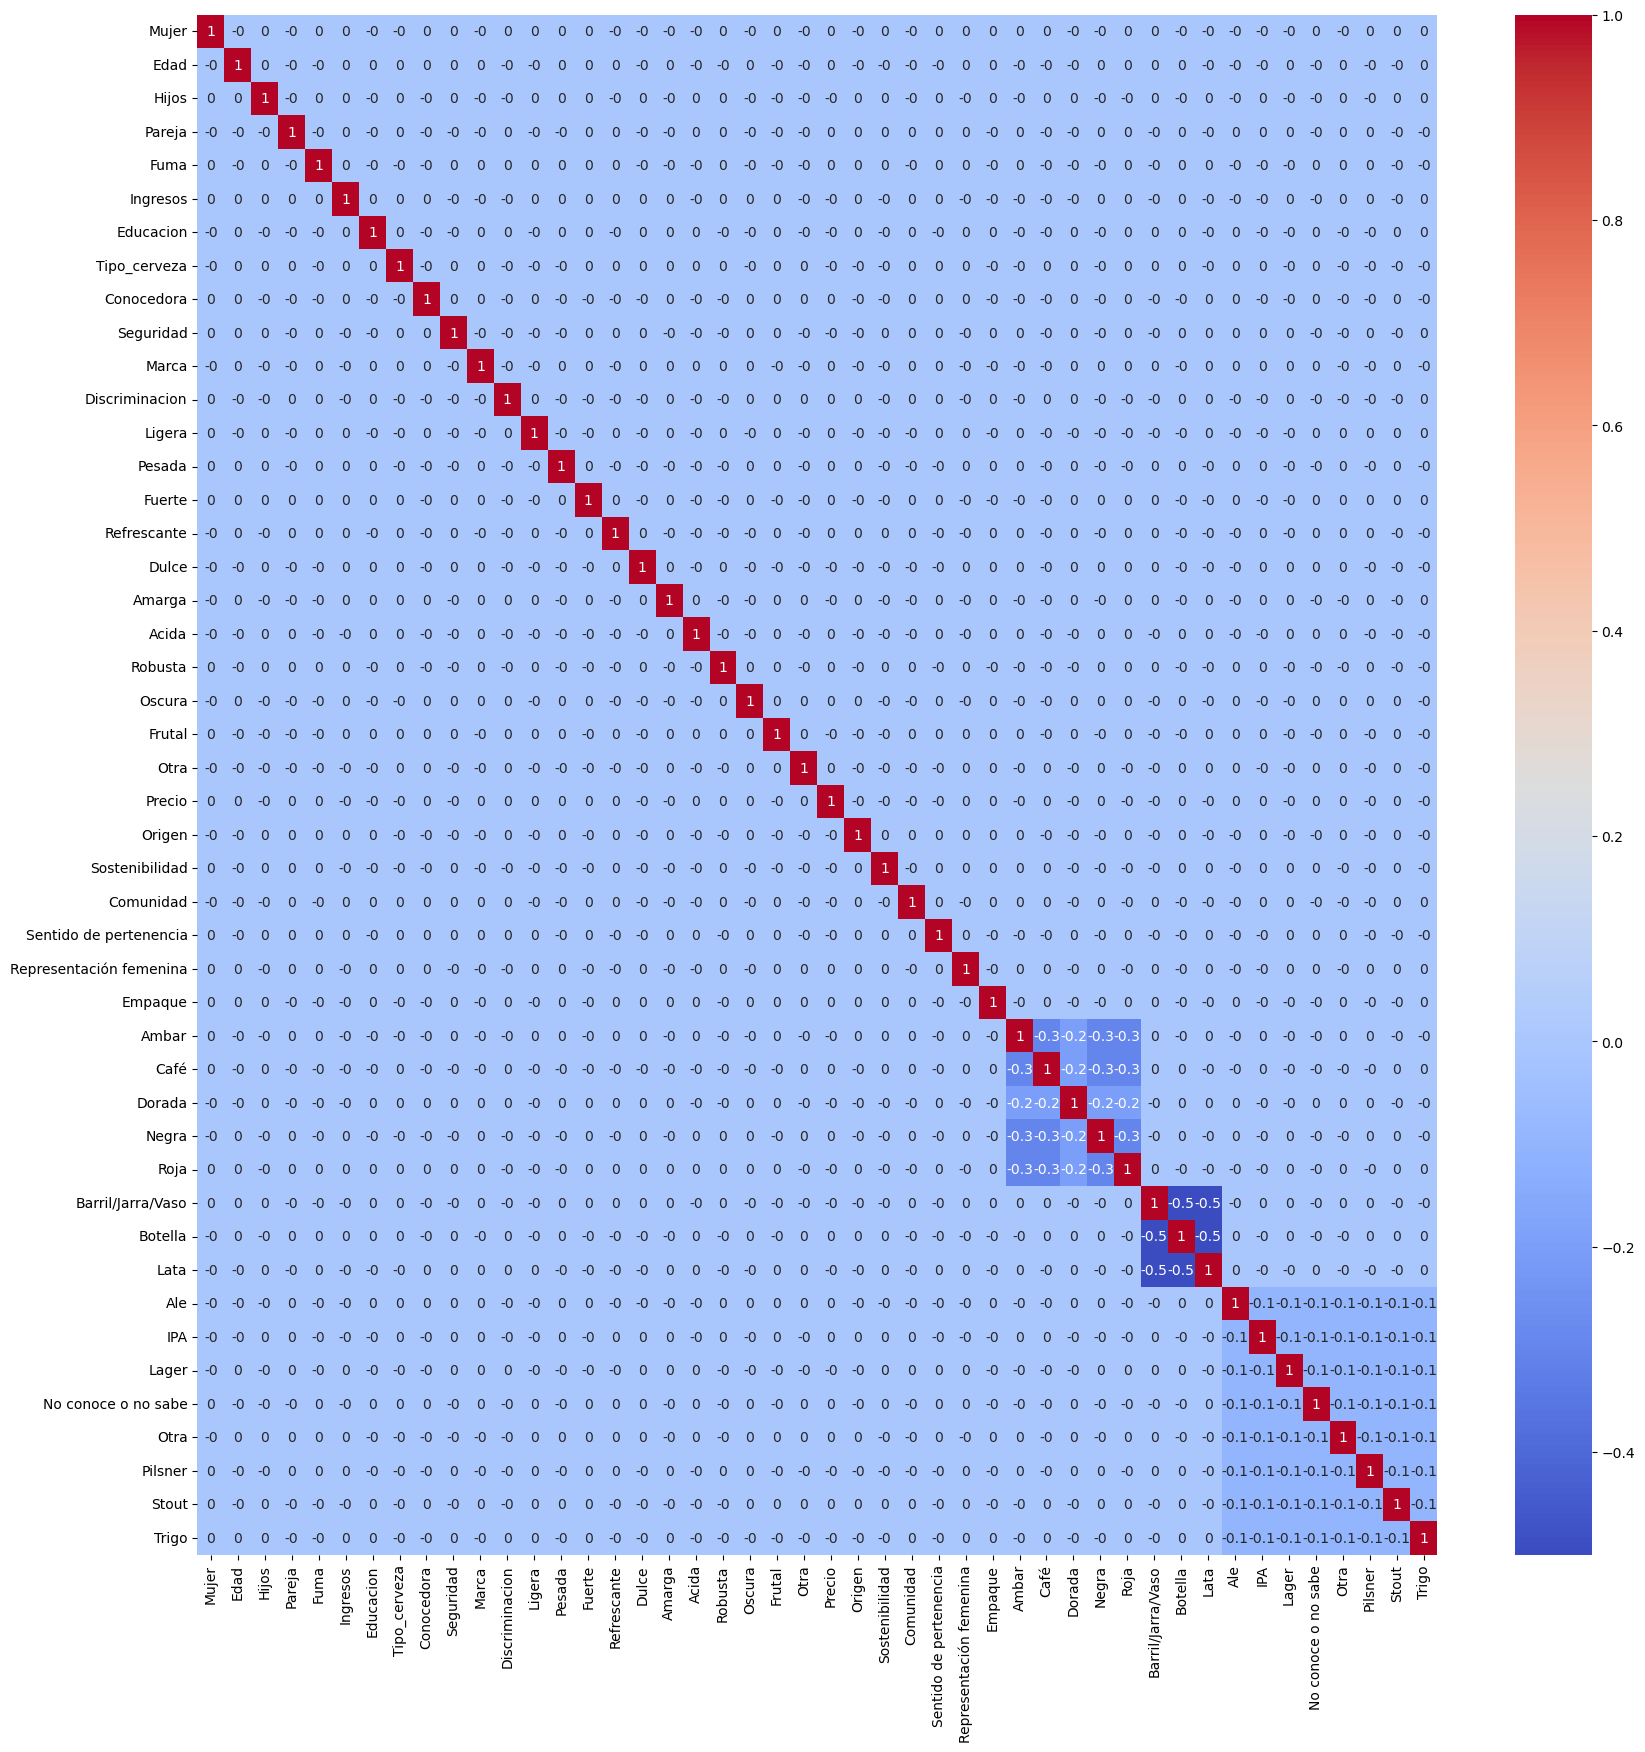

In [111]:
#quiero generar un mapa de calor para ver la correlación entre las variables, reduce los decimales a 1 para que sea más fácil de leer
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr().round(1), annot=True, cmap='coolwarm')
plt.show()


# Decision Trees

### Importando librerias y separando el conjunto de datos

In [96]:
# Importando las bibliotecas necesarias para el modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

# Dividir el conjunto de datos y entrenar el modelo, se usa random_state para que los resultados sean reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### GridSearch

In [97]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1,30),
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

# Inicializar el modelo
dt = DecisionTreeClassifier(random_state=0)

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 1450 candidates, totalling 7250 fits


{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

### Instancia, entrenamiento y evaluación del modelo

In [98]:
# instancio el modelo
modelo = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=0)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Evaluar el modelo
y_pred = modelo.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_pred):.2f}")

Exactitud del modelo: 0.32


### Estadisticos de validación

In [103]:
y_pred = modelo.predict(X_test)
print(f"Reporte del modelo:\n {classification_report(y_test, y_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

   Frecuente       0.33      0.54      0.41       987
  No consume       0.35      0.06      0.11      1060
   Ocasional       0.32      0.39      0.35       953

    accuracy                           0.32      3000
   macro avg       0.33      0.33      0.29      3000
weighted avg       0.33      0.32      0.28      3000



### Feature importance

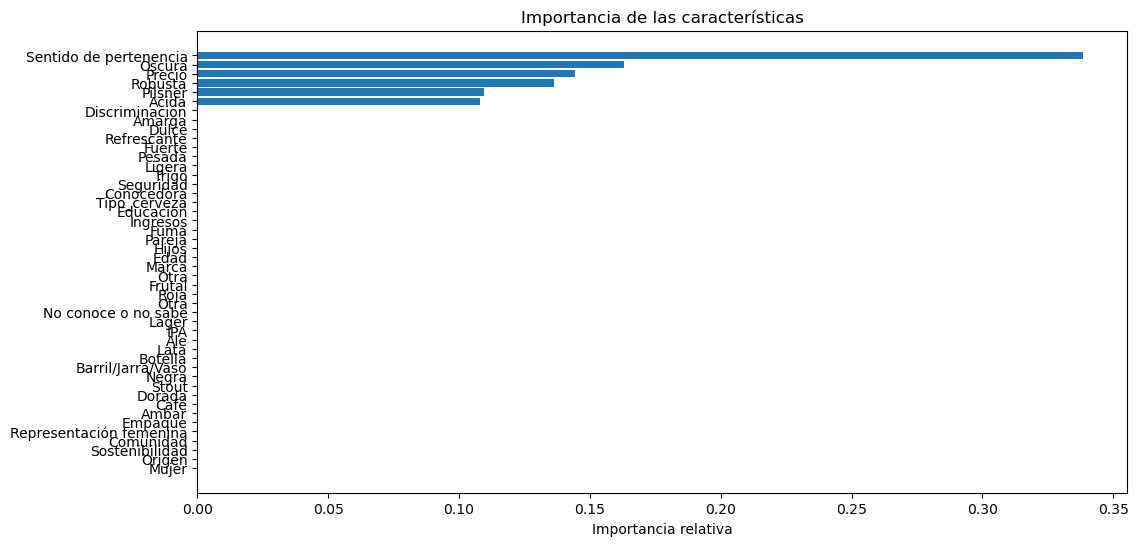

In [99]:
#feature importance
feature_importance = modelo.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

### Curva de aprendizaje

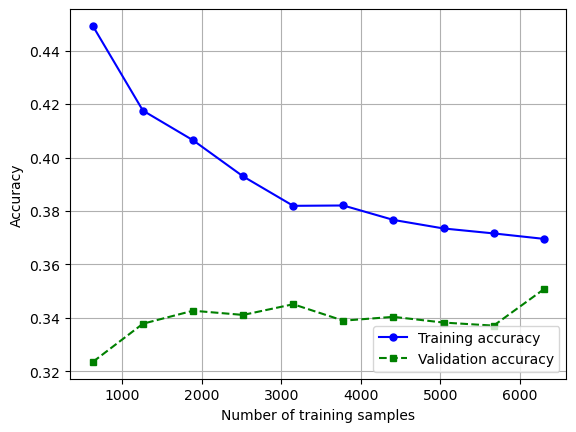

In [104]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=modelo,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Random forest

### Grid Search

In [105]:
#Gridsearch para encontrar los mejores hiperparámetros para el modelo de random forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir los hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}

# Inicializar el modelo
rf = RandomForestClassifier(random_state=0)

# Inicializar GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
grid_search.best_params_

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

### Creación del modelo

In [106]:

# instancio el modelo
modelo_rf = RandomForestClassifier(n_estimators=100,criterion='gini' ,random_state=0, max_depth=5 ,min_samples_leaf=10, min_samples_split=2)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Evaluar el modelo
y_rf_pred = modelo_rf.predict(X_test)
print(f"Exactitud del modelo: {accuracy_score(y_test, y_rf_pred):.2f}")

Exactitud del modelo: 0.33


### Estadisticos de validación

In [107]:
y_rf_pred = modelo_rf.predict(X_test)
print(f"Reporte del modelo:\n {classification_report(y_test, y_rf_pred, zero_division=0)}")

Reporte del modelo:
               precision    recall  f1-score   support

   Frecuente       0.33      0.58      0.42       987
  No consume       0.35      0.23      0.27      1060
   Ocasional       0.29      0.17      0.21       953

    accuracy                           0.33      3000
   macro avg       0.32      0.33      0.30      3000
weighted avg       0.32      0.33      0.30      3000



In [108]:
# Evaluar el modelo
y_rf_pred = modelo_rf.predict(X_test)
print(f"Matriz de consfusion:\n {confusion_matrix(y_test, y_rf_pred)}")

Matriz de consfusion:
 [[576 222 189]
 [616 240 204]
 [566 228 159]]


### feature importance

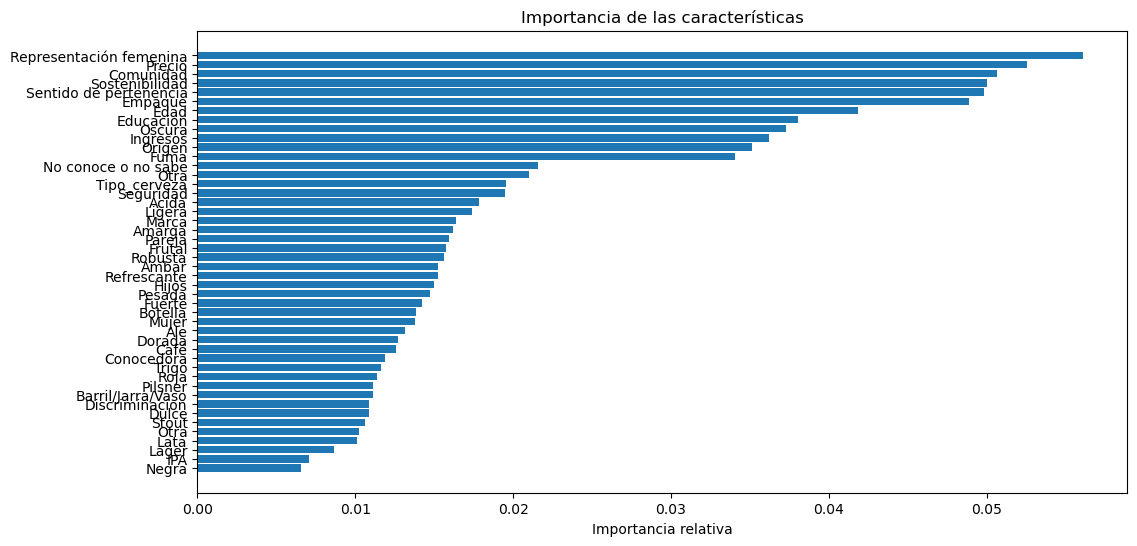

In [109]:
#feature importance
feature_importance = modelo_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Importancia relativa')
plt.title('Importancia de las características')
plt.show()

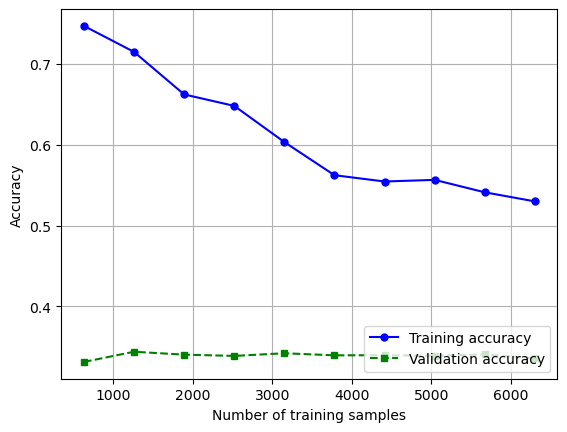

In [110]:
train_sizes, train_scores, test_scores = learning_curve(estimator=modelo_rf,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()